In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
alphap = 2
probp = 0.75
expon = 2 * alphap - 1
ensemble_sizep = 50_0
min_iterationp = 100_000
bin_sizep = 0.001

## Defining directory

In [3]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig  ="../../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../../data/temp/alpha{}/".format(alphap)
dir_fig  ="../../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")

directory  ../../data/temp/alpha2/  exists
directory  ../../figures/temp/alpha2/  exists


In [4]:
figure_name = dir_fig + "pn_data_coll_alpha_3.pdf"

In [5]:
%run ../../stochastic_fractal_m.py

## Simulation using class

In [6]:
stochastic_frag = TrueLengths(alpha=alphap, probability=probp)

kwargs  {'alpha': 2, 'probability': 0.75}
Turning on logging


In [7]:
# lengths_enselbme = stochastic_frag.run_ensemble(ensemble_size, total_iteration)

In [8]:
ana_soln = AnalyticSoln()

## Other functions

In [9]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [10]:
def histrogram_data(data, bin_size = bin_sizep):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## fitting data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [11]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

In [12]:
def plot_data(total_iteration):
    df = ana_soln.find_df(alphap,probp)
    
    # doing the simulation here
    ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
    x,y = histrogram_data(ens_data)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))
    phi_analytic = ana_soln.phi_list(alphap,probp,xi)  # from class
    a1_sum, a2_sum = fitting_parameter(phi, phi_analytic)
    print(a1_sum, ", ", a2_sum)
    return xi, phi, a1_sum, a2_sum

In [13]:
data_dict = {}
a1_sum, a2_sum = 0,0
for i in range(3):
    time_t = min_iterationp*(i+1)
    xi, phi, a1, a2 = plot_data(time_t)
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for i in range(3):
    time_t = min_iterationp*(i+1)
    data_dict[time_t][1]*=(a1_sum/a2_sum)

realization  5  . Time spent  0.6389293670654297  sec
realization  10  . Time spent  0.5316481590270996  sec
realization  15  . Time spent  0.570173978805542  sec
realization  20  . Time spent  0.6091427803039551  sec
realization  25  . Time spent  0.5407781600952148  sec
realization  30  . Time spent  0.6347601413726807  sec
realization  35  . Time spent  0.5163955688476562  sec
realization  40  . Time spent  0.5146534442901611  sec
realization  45  . Time spent  0.6424148082733154  sec
realization  50  . Time spent  0.5878169536590576  sec
realization  55  . Time spent  0.5038950443267822  sec
realization  60  . Time spent  0.5985560417175293  sec
realization  65  . Time spent  0.5621874332427979  sec
realization  70  . Time spent  0.49405479431152344  sec
realization  75  . Time spent  0.515880823135376  sec
realization  80  . Time spent  0.49108052253723145  sec
realization  85  . Time spent  0.5283846855163574  sec
realization  90  . Time spent  0.5681383609771729  sec
realization

realization  235  . Time spent  1.2786433696746826  sec
realization  240  . Time spent  1.0360548496246338  sec
realization  245  . Time spent  1.094996452331543  sec
realization  250  . Time spent  1.3264656066894531  sec
realization  255  . Time spent  1.1352152824401855  sec
realization  260  . Time spent  1.0141031742095947  sec
realization  265  . Time spent  1.0095241069793701  sec
realization  270  . Time spent  1.2424771785736084  sec
realization  275  . Time spent  1.5907726287841797  sec
realization  280  . Time spent  1.3417534828186035  sec
realization  285  . Time spent  1.7939093112945557  sec
realization  290  . Time spent  1.9100043773651123  sec
realization  295  . Time spent  1.3190908432006836  sec
realization  300  . Time spent  1.1244521141052246  sec
realization  305  . Time spent  1.3326725959777832  sec
realization  310  . Time spent  1.2070369720458984  sec
realization  315  . Time spent  1.265350580215454  sec
realization  320  . Time spent  1.1535618305206299

realization  465  . Time spent  1.824073314666748  sec
realization  470  . Time spent  1.898982286453247  sec
realization  475  . Time spent  1.6361253261566162  sec
realization  480  . Time spent  1.5322787761688232  sec
realization  485  . Time spent  1.465381145477295  sec
realization  490  . Time spent  1.5658583641052246  sec
realization  495  . Time spent  1.5573816299438477  sec
realization  500  . Time spent  2.6174826622009277  sec
Total time spent  176.63082194328308  sec
18.28404110350527 ,  8.879904200739643


In [14]:
data_dict.keys()

dict_keys([100000, 200000, 300000])

### Saving data for later use

In [15]:
signature = 'data_collapse_alpha_{}_t_{}k'
for time_t in data_dict.keys():
    x,y = data_dict[time_t]
    file_name = signature.format(alphap, int(time_t//1000))
    np.savetxt(dir_data+file_name,np.c_[x,y])

## Plotting

../../figures/temp/alpha2/pn_data_coll_alpha_3.pdf


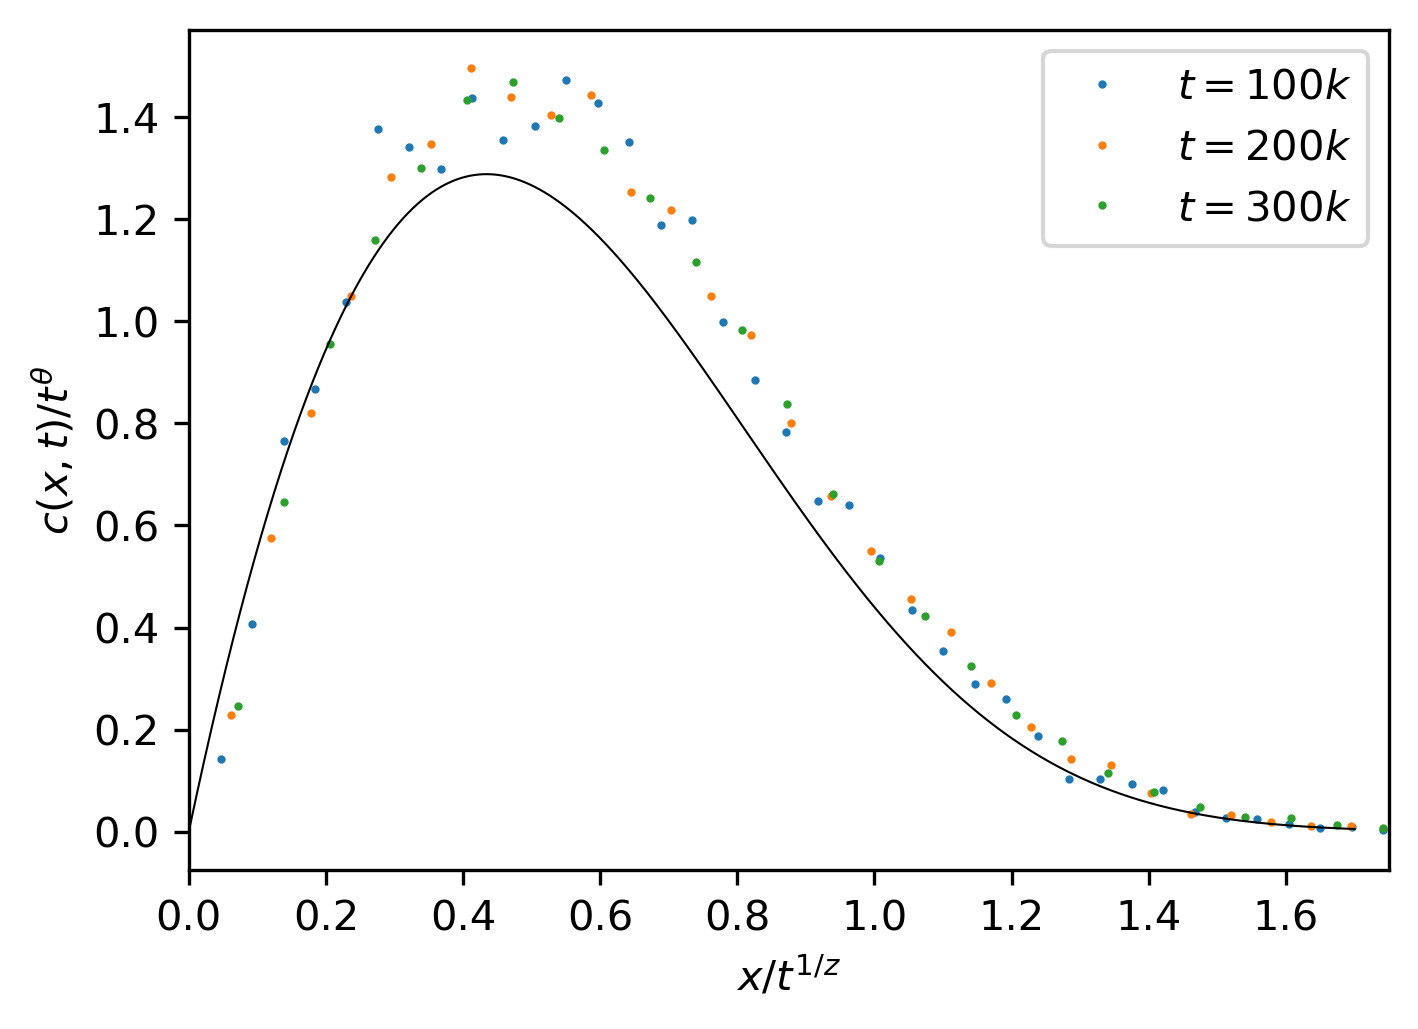

In [21]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y*0.7,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

xi_th = np.linspace(0,1.7,8501)
xis, phi_th = ana_soln.phi_list(alphap,probp,xi_th)  # from class
plt.plot(xi_th, phi_th,color='black',linewidth=0.5)

plt.legend(loc=1)
plt.xlabel(r"$x/t^{1/z}$")
plt.ylabel(r"$c(x,t)/t^\theta$")
plt.xlim([0, 1.75])
axes.set_position([0.15, 0.15, 0.8, 0.8])

print(figure_name)
# plt.savefig(figure_name)